# Classificação de clientes

In [36]:
%matplotlib inline

# join one or more path components intelligently
from os.path import join

# Interface com o sistema operacional
import os

# Manipulação de dataframes
import pandas as pd

# Manipulação de dados tabulares
import numpy as np

# Normalização das características
from sklearn.preprocessing import StandardScaler

# visualização de dados baseada no matplotlib
import seaborn as sns

# Esboço de gráficos
from matplotlib import pyplot as plt

## Carga e inspeção dos dados

In [37]:
# Definição dos nomes das variáveis (conforme a tabela contida no enunciado)
colnames = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
            'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [38]:
# Leitura dos dados de treino
arquivo = './credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names = colnames)

# Leitura dos dados de teste
arquivo = './credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names = colnames)

**Inspeção dos dados**

In [39]:
# Inspeção da dimensão do dataset
print(data_train.shape, data_test.shape)

(1500, 12) (577, 12)


In [40]:
# Inspeção das primeiras linhas do conjunto de treinamento
data_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [41]:
# Inspeção das primeiras linhas do conjunto de teste
data_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


## Pré-processamento dos dados

### Transformação de variáveis não-numéricas

É importante observar que a variável ESCT (Estado Civil) é do tipo categórica, podendo assumir 4 valores diferentes (cada valor corresponde a um estado civil). Assim, diferentemente de NDEP (onde cada valor corresponde a uma quantidade de dependentes), na variável ESCT cada valor corresponde a uma categoria. Contudo, este fato pode trazer inconsistências na criação e treinamento de modelos.

Para mitigar este problema, uma alternativa é tranformar a variável ESCT em uma variável *dummy* (variável binária). Neste sentido, cada categoria da variável ESCT corresponderá a uma variável. Visto que há 4 possíveis categorias para a variável ESCT, obteremos 4 variáveis ESCT binárias.

Uma variável *dummy* é uma variável binária utilizadas para representar categorias. Neste sentido, em um caso de uma variável com 3 ou mais categorias, recomenda-se a criação de $n-1$ dummies. Diante disso, a variável ESCT será transformada em 4 "variantes dummy", onde o valor 1 corresponderá à ocorrência de determinada categoria e o valor 0 corresponderá à não ocorrência.

In [42]:
# Aplicação no conjunto de treinamento
data_train_new = pd.get_dummies(data = data_train, 
                                prefix='ESCT', 
                                columns=['ESCT'], 
                                drop_first=True)

"""
pd.get_dummies: Convert categorical variable into dummy/indicator variables.
"""

# Inspeção das primeiras linhas
data_train_new.head()

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,0,360,0,313,9,52,0,25,48,0,1,1,0,0
1,0,350,1,468,10,65,0,33,6,0,1,0,0,0
2,0,1100,0,829,9,125,0,56,48,0,1,0,0,0
3,0,3000,0,552,12,76,1,31,60,0,1,0,0,0
4,0,1000,0,809,12,111,0,24,7,0,1,1,0,0


In [43]:
# Aplicação da transformação sobre o conjunto de teste
data_test_new = pd.get_dummies(data = data_test, prefix='ESCT', columns=['ESCT'], drop_first=True)

"""
pd.get_dummies: Convert categorical variable into dummy/indicator variables
"""

# Inspeção das primeiras linhas
data_test_new.head()

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,2,500,1,618,10,85,0,36,6,0,0,0,0,0
1,0,813,0,552,4,119,0,43,48,119,1,1,0,0
2,0,350,0,488,12,66,0,43,0,0,1,0,0,1
3,0,1530,0,381,1,398,0,28,48,0,1,1,0,0
4,0,688,1,396,10,60,0,49,72,0,1,0,0,0


**Separação do conjunto de dados em rótulo ($\mathrm{y}$) e features ($\mathrm{x}$)**

O rótulo ($\mathrm{y}$) corresponde ao vetor contendo a variável alvo (CLASSE), enquanto que features ($\mathrm{x}$) corresponde à matriz de dados.

In [44]:
# Transformação da variável alvo do conjunto de treinamento em vetor
y_train = np.array(data_train_new['CLASSE'])

# Inspeção das primeira linhas
y_train[:5]

array([1, 1, 1, 1, 1])

In [45]:
# Transformação da variável alvo do conjunto de teste em vetor
y_test = np.array(data_test_new['CLASSE'])

# Inspeção das primeiras linhas
y_test[:5]

array([0, 1, 1, 1, 1])

In [46]:
# Transformação do conjunto de treinamento remanescente em matriz de dados
features_name_train = list(data_train_new.columns)               # nomes das colunas
features_name_train.remove('CLASSE')                             # remove variável "CLASSE"
X_train = np.array(data_train_new.loc[:, features_name_train])   # Transformação em matriz de dados

# Inspeção da matriz resultante
X_train

array([[   0,  360,    0, ...,    1,    0,    0],
       [   0,  350,    1, ...,    0,    0,    0],
       [   0, 1100,    0, ...,    0,    0,    0],
       ...,
       [   0,  570,    0, ...,    0,    0,    0],
       [   0,  360,    0, ...,    0,    0,    0],
       [   4,  501,    1, ...,    0,    0,    0]])

In [47]:
# Transformação do conjunto de teste remanescente em matriz de dados
features_name_test = list(data_test_new.columns)               # Recuperação dos nomes das colunas
features_name_test.remove('CLASSE')                            # Remoção da variável "CLASSE"
X_test = np.array(data_test_new.loc[:, features_name_test])   # Transformação em matriz

# Inspeção da matriz resultante
X_test

array([[   2,  500,    1, ...,    0,    0,    0],
       [   0,  813,    0, ...,    1,    0,    0],
       [   0,  350,    0, ...,    0,    0,    1],
       ...,
       [   3, 1200,    0, ...,    0,    0,    0],
       [   0,  600,    0, ...,    1,    0,    0],
       [   0,  800,    1, ...,    0,    0,    0]])

### Normalização das features

Antes de iniciar o treinamento, é também necessário realizar a *normalização* das características a fim de evitar problemas decorrentes à discrepância nas ordens de grandeza das features.

In [48]:
# Criação do objeto para a padronização das features
scaler = StandardScaler()

# Ajustamento do StandardScaler ao conjunto de dados de treino e padronização dos dados de treino
X_train_norm = scaler.fit_transform(X_train)

# Transformação dos dados de teste com os parâmetros ajustados a partir dos dados de treino
X_test_norm = scaler.transform(X_test)

In [49]:
# Dimensões dos datasets
print(X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape)

(1500, 13) (577, 13) (1500,) (577,)


## Treinamento do modelo

Nessa parte, precisamos converter os datasets para Tensores do Pytorch, entretando,

Como o dtype dos inputs e outputs são diferentes, precisamos convertelos para um tipo único, convertendo então para float32.

Além disso, precisamos adicionar uma "coluna" no conj. de treino, pois o seu formato é o
de um vetor/array, o que prejudicaria nos cálculos, sendo assim,
convertemos o shape dos datasets também:


In [50]:
# transformando numpy arrays em  Tensores do Pytorch
# Convertendo os datsets de treino e de tests.:

# dataset de treino
X_train_tensor = torch.from_numpy(X_train_norm).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)

# dataset de testes
X_test_tensor = torch.from_numpy(X_test_norm).float()
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(1)

print("Tipos de dados de X: {0} e Y: {1}".format(X_test_norm.dtype, y_train.dtype))
print('Transformando o shape do output de treino:')
print("treino -> de {0} para {1}".format(torch.from_numpy(y_train).shape, y_train_tensor.shape))
print("teste ->  de {0} para {1}".format(torch.from_numpy(y_train).shape, y_train_tensor.shape))

Tipos de dados de X: float64 e Y: int64
Transformando o shape do output de treino:
treino -> de torch.Size([1500]) para torch.Size([1500, 1])
teste ->  de torch.Size([1500]) para torch.Size([1500, 1])


Nessa parte, definimos alguns objetos e variáveis importantes, como a criação do tensor dataset, os dataloaders e alguns hyperparâmetros:

Definimos duas funções de perda que foram utilizadas para testar o modelo:
- mse_loss
- binary cross entropy

- **Tamanho do Lote**, sendo O BATCH_SIZE de valor 50.

Os outros hyperparâmetros:

- **Quantidade de épocas de treinamento**, sedo NUM_EPOCHS, de valor 20.

- **Taxa de aprendizado**, sendo LEARN_RATE com valor de 0.01.

- **quantidade de neurônios na camada de entrada**, sendo o input_size, com valor 13.

- **quantidade de neurônios na camada oculta**, sendo o hidden_size com valor 4, calculados por (BATCH_SIZE // input_size) + output_size.

- **quantidade de neurônios na camada de saída**, sendo o output_size com valor 1.

- Foram utilizadas duas funções de ativações, a **relu** e **sigmoid**, aplicadas na hidden layer e output layer respectivamente.


In [51]:
# seu código aqui

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as torch_functions

#################### Hyper Parâmetros ####################
# Define loss function
mse_loss = torch_functions.mse_loss
bce_loss = torch_functions.binary_cross_entropy 

# Definindo algumas constantes
BATCH_SIZE = 50
LEARNING_RATE = 0.1
NUM_EPOCHS = 20

input_size = X_train_tensor.shape[1]
output_size = y_train_tensor.shape[1]
hidden_size = (BATCH_SIZE // input_size) + output_size

opt_func=torch.optim.SGD
##########################################################


# Definindo objetos tensores de dataset e o dataloader para o conj. de dados
# de treino e de testes.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataset_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)


test_dataset        = TensorDataset(X_test_tensor, y_test_tensor)
test_dataset_loader = DataLoader(test_dataset, BATCH_SIZE)

# imprime algumas informações importantes na tela

for x, y in train_dataset_loader:
    print('x: {}'.format(x.shape))
    print('y: {}'.format(y.shape))
    break


print(input_size, hidden_size, output_size)


x: torch.Size([50, 13])
y: torch.Size([50, 1])
13 4 1


## Etapa de Modelagem do problema:

Nessa parte foi definida uma classe de Modelo do problema e uma função de treino:


In [59]:
# Definindo um modelo para o problema:

################ Classe que Modela o problema a ser resolvido ################
import torch.nn as nn

class Model(torch.nn.Module):

    def __init__(self, input_size, hidden_size, output_size, f_loss):
        super().__init__()

        # função loss
        self.f_loss = f_loss

        # Primeira camada de neurônios(Hidden Layer) da rede:
        self.hidden_layer = nn.Linear(input_size, hidden_size)

        # camada de saída da rede:
        self.output_layer = nn.Linear(hidden_size, output_size)

        self.evaluate_history = []

    def forward(self, _input):
        hidden_output = self.hidden_layer(_input)
        # Usando a função de ativação da camada oculta
        out = torch_functions.relu(hidden_output)
        # camada de saída
        out = self.output_layer(out)

        # Usando a função de ativação da camada de saída
        out = torch_functions.sigmoid(out)
        return out
    
    def training_step(self, x, y):
        output = self(x)
        loss = self.f_loss(output, y)

        return loss

    def evaluate(self, validation_batch):
        loss = []
        accuracy = []
        for x, y in validation_batch:
            kw = self.validation_step(x, y)
            loss.append(kw.get('loss'))
            accuracy.append(kw.get('accuracy'))

        value =  {
            'loss': torch.stack(loss).mean().item(),
            'accuracy': torch.stack(accuracy).mean().item()
        }

        self.evaluate_history.append((value['loss'], value['accuracy']))

        return value

    def accuracy(self, output, y_test):

        output = torch.round(output)

        results = (output == y_test).sum().float()
        acc = results/y_test.shape[0]
        acc = acc * 100
        
        return acc

    def validation_step(self, x, y): # x, y batch
        output = self(x)
        loss = self.f_loss(output, y)
        _accuracy = self.accuracy(output, y)

        value = {'loss':loss, 'accuracy': _accuracy}

        return value


################ Função responsável por treinar o modelo ################
def traning_model(model, epochs, learning_rate, train_loader, validation_loader, opt_func=torch.optim.SGD):
    opt = opt_func(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        for x, y in train_dataset_loader:
            loss = model.training_step(x, y)

            loss.backward()

            opt.step()

            opt.zero_grad()

        result = model.evaluate(validation_loader)

        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['loss'], result['accuracy']))


## Etapa de treino do modelo em 20 épocas:

Podemos perceber que o modelo converge rapidamente, tendo uma precisão média de de 80% >

In [53]:

# dation_history.append((loss, _accuracy))
        # self.validation_history_count += 1
model = Model(input_size, hidden_size, output_size, mse_loss)


traning_model(model, NUM_EPOCHS, LEARNING_RATE, train_dataset_loader, test_dataset_loader)


Epoch [0], val_loss: 0.2604, val_acc: 46.1111
Epoch [1], val_loss: 0.2545, val_acc: 46.4444
Epoch [2], val_loss: 0.2507, val_acc: 49.9198
Epoch [3], val_loss: 0.2476, val_acc: 58.8210
Epoch [4], val_loss: 0.2441, val_acc: 59.1543
Epoch [5], val_loss: 0.2392, val_acc: 65.0802
Epoch [6], val_loss: 0.2312, val_acc: 72.1975
Epoch [7], val_loss: 0.2182, val_acc: 78.5062
Epoch [8], val_loss: 0.2004, val_acc: 82.4815
Epoch [9], val_loss: 0.1808, val_acc: 85.1481
Epoch [10], val_loss: 0.1629, val_acc: 85.8148
Epoch [11], val_loss: 0.1486, val_acc: 86.6482
Epoch [12], val_loss: 0.1376, val_acc: 86.4815
Epoch [13], val_loss: 0.1291, val_acc: 87.7901
Epoch [14], val_loss: 0.1224, val_acc: 88.0988
Epoch [15], val_loss: 0.1173, val_acc: 88.4321
Epoch [16], val_loss: 0.1132, val_acc: 88.5741
Epoch [17], val_loss: 0.1098, val_acc: 88.5741
Epoch [18], val_loss: 0.1068, val_acc: 88.7407
Epoch [19], val_loss: 0.1045, val_acc: 88.9074


## Validação do modelo

Agore iremos validar e testar o modelo, verificando seu desempenho geral.

Para isso, iremos desenvolver alguns itens como a curva de aprendizado, a matriz de confusão, o resultado da classification report do Scikit-Learn


### Gráfico de Curva de aprendizado e Curva de perda X épocas:

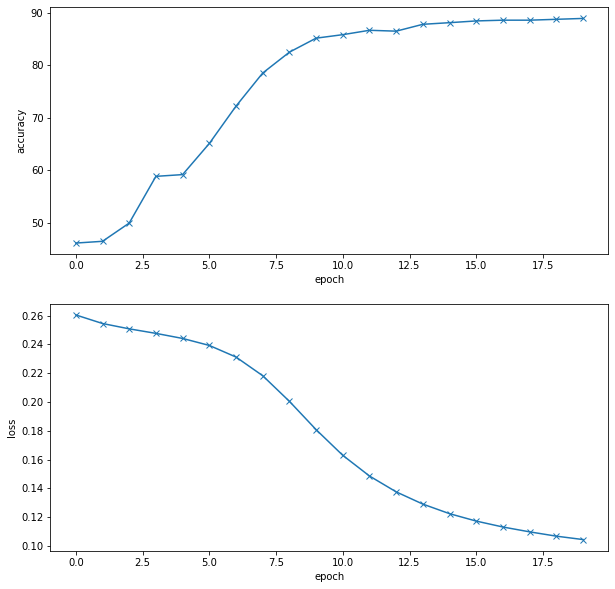

In [54]:
# seu código aqui


accuracies = [result[1] for result in model.evaluate_history]
losses = [result[0] for result in model.evaluate_history]

fig, axs = plt.subplots(2, figsize=(10, 10))

axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].plot(accuracies, '-x')
axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].plot(losses, '-x')


### Matriz de confusão e  classification report:

In [55]:

from sklearn.metrics import confusion_matrix, classification_report

predictions = []

model.eval()
with torch.no_grad():
    for x, y in test_dataset_loader:
        output = model(x)
        output_rounded = torch.round(output)
        predictions.extend(output_rounded.squeeze().tolist())

print("Confusion Matrix:")
print('_'*60)
print('\t{0}\n\t{1}'.format(*confusion_matrix(y_test, predictions)))

print('Classification report')
print('_'*60)
print(classification_report(y_test, predictions))

Confusion Matrix:
____________________________________________________________
	[303   3]
	[ 61 210]
Classification report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       306
           1       0.99      0.77      0.87       271

    accuracy                           0.89       577
   macro avg       0.91      0.88      0.89       577
weighted avg       0.90      0.89      0.89       577



27
12
600


 # Q2 - Predição de preços de diamantes

## Carga e inspeção dos dados

Nesta etapa, iremos analisar o conjunto de dados "diamonds.csv".

Como podemos ver, esse dataset possui um shape de (53941 x 10)

Sendo a primeira linha, representada pelo header dentro do próprimo dataset,

o primeiro tratamento a ser feito nessa etapa é remover essa linha do conjunto de dados.

Resultando um dataset com o shape de (53940 x 10) pronto para ser analisado.


In [56]:
# seu código aqui

# global imports
import random


colnames = [
'carat', 'cut',
'color', 'clarity' ,
'depth', 'table',
'price',
'x', 'y', 'z'
]

arquivo = './diamonds.csv'

# Leitura do dataset diamonds
pd_dataset = pd.read_csv(arquivo, sep=',', header=None, names = colnames)

print("Shape before {}".format(pd_dataset.shape))

# Removendo o Head que vem dentro do arquivo(Não consegui utilizar a linha como head).
pd_dataset = pd_dataset.drop(pd_dataset.index[0])

# print o shape.
print("Shape after {}".format(pd_dataset.shape))

pd_dataset


Shape before (53941, 10)
Shape after (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
1.0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2.0,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3.0,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4.0,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5.0,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936.0,0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.5
53937.0,0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
53938.0,0.7,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
53939.0,0.86,Premium,H,SI2,61,58,2757,6.15,6.12,3.74


## Pré-processamento dos dados

### Transformação de variáveis não-numéricas

Na tabela exibida na celula anterior, conseguimos perceber alguns problemas,

como as **variáveis não-numéricas do conjunto de dados**, sendo elas  **cut, color e clarity**.

Seguindo a regra de ***n - 1 dummy variables***, teremos os seguintes resultados:

cut possui 5 categorias => 4 colunas resultantes,

color possui 7 categorias => 6 colunas resultantes,

clarity possui 8 categorias => 7 colunas resultantes

Resultando em um dataset com 24 colunas( 10 anteriores + as 17 novas colunas - as 3 colunas antigas de cut, color e clarity).



In [69]:
print("\nCategorias:\n")
print(pd_dataset['cut'].unique())
print(pd_dataset['color'].unique())
print(pd_dataset['clarity'].unique())
print('_'*50)

dataset = pd.get_dummies(data = pd_dataset, 
                                prefix=['cut', 'color','clarity'], 
                                columns=['cut', 'color', 'clarity'], drop_first=True)

dataset[0:10]


Categorias:

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
__________________________________________________


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1.0,0.23,61.5,55,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2.0,0.21,59.8,61,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3.0,0.23,56.9,65,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4.0,0.29,62.4,58,334,4.2,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5.0,0.31,63.3,58,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
6.0,0.24,62.8,57,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7.0,0.24,62.3,57,336,3.95,3.98,2.47,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8.0,0.26,61.9,55,337,4.07,4.11,2.53,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9.0,0.22,65.1,61,337,3.87,3.78,2.49,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10.0,0.23,59.4,61,338,4,4.05,2.39,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Criando uma amostragem para teste e Normalizando os conjuntos de dados.


- Removendo a coluna price(a variável dependente a ser prevista pela rede) do conjunto de dados e criando um novo conjunto separado para estudo da rede.

- Nesta parte, iremos separar os 20% do dataset diamonds(previamente tratado), para o conjunto de testes, como especificado no enunciado do trabalho.

- Tratamento/normalização dos dataset de treino e teste, para evitar discrepâncias nas ordens de grandezas(assim como foi feito na Q1).


In [72]:


######### separando a amostra de 20% para o conj. de testes ########
# antes de prosseguirmos com o tratamento do conj de dados.
from sklearn.model_selection import train_test_split

print(dataset.shape)
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2)
print(dataset_test.shape)
print(dataset_train.shape)
######## Separando a variável price em um novo conjunto ########
dataset_train_x = np.array(dataset_train.drop(columns=['price']))
dataset_train_y = np.array(dataset_train['price'], dtype=np.float64)


dataset_test_x = np.array(dataset_test.drop(columns=['price']))
dataset_test_y = np.array(dataset_test['price'], dtype=np.float64)

######## Tratamento/Normalização dos datasets ########
# Criação do objeto para a padronização das features
scaler = StandardScaler()

# Ajustamento do StandardScaler ao conjunto de dados de treino e padronização dos dados de treino
dataset_train_x = scaler.fit_transform(dataset_train_x)

# Transformação dos dados de teste com os parâmetros ajustados a partir dos dados de treino
dataset_test_x = scaler.transform(dataset_test_x)


# Dimensões dos datasets
print(dataset_train_x.shape, dataset_test_x.shape, dataset_test_y.shape, dataset_test_y.shape)


(53940, 24)
(10788, 24)
(43152, 24)
(43152, 23) (10788, 23) (10788,) (10788,)


## Treinamento do modelo


#### Etapa de pré-treino, preparando alguns objetos:
- Transformando os datasets em tensores,
- Definindo algumas constantes e hyperparâmetros,
- Criando tensores de dataset e o dataloaders


In [73]:
# seu código aqui

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as torch_functions

########### Transformando os datasets em tensores ###########
# transformando numpy arrays em  Tensores do Pytorch
# Convertendo os datsets de treino e de tests.:

# dataset de treino
x_train = torch.from_numpy(dataset_train_x).float()

y_train = torch.from_numpy(dataset_train_y).float().unsqueeze(1)

# dataset de testes
x_test = torch.from_numpy(dataset_test_x).float()
y_test = torch.from_numpy(dataset_test_y).float().unsqueeze(1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#################### Hyper Parâmetros ####################
# Define loss function
mse_loss = torch_functions.mse_loss
opt_func=torch.optim.SGD

# Definindo algumas constantes
BATCH_SIZE = 100
LEARNING_RATE = 0.1
NUM_EPOCHS = 10

# Número de neurônios da Rede
input_size = x_train.shape[1]
output_size = y_train.shape[1]
hidden_size = 5

############# Criando tensores de dataset e o dataloaders #############
# Definindo objetos tensores de dataset e o dataloader para o conj. de dados
# de treino e de testes.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataset_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)


test_dataset        = TensorDataset(X_test_tensor, y_test_tensor)
test_dataset_loader = DataLoader(test_dataset, BATCH_SIZE)

print(train_dataset_loader)

torch.Size([43152, 23]) torch.Size([10788, 23]) torch.Size([43152, 1]) torch.Size([10788, 1])


## Etapa de Modelagem do problema:

Nessa parte do trabalho, desenvolvemos a classe modelo, responsável por
implementar/resolver o problema em questão.

Para tal, **criei uma classe ModelDiamond** que herda todas as características
da **classe Model da questão 1**, porém, sobreescrevendo alguns métodos da classe Model, para poder resolver o nosso problema alvo.

Além disso, também reutilizei a função de treino da questão 1.


In [87]:
# seu código aqui
# Definindo um modelo para o problema:


################ Classe que Modela o problema a ser resolvido ################
import torch.nn as nn

class DiamondModel(Model):

    def __init__(self, input_size, hidden_size, output_size, f_loss):
        super().__init__(input_size, hidden_size, output_size, f_loss)


# dm = DiamondModel()
print(x_train.shape[1], y_train.shape[1])

dm = DiamondModel(23, 1, 1, mse_loss)

23 1


In [93]:
dm(x_test[0])

tensor([0.5067], grad_fn=<SigmoidBackward0>)

## Validação do modelo

In [201]:
# seu código aqui

# Classificação de imagens (Fashion MNIST)

## Carga e inspeção dos dados

In [202]:
# seu código aqui

## Pré-processamento dos dados

In [203]:
# seu código aqui

## Treinamento do modelo

In [204]:
# seu código aqui

## Validação do modelo

In [205]:
# seu código aqui